In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 1.Data generation
np.random.seed(42)
X = np.linspace(-3, 3, 100)
# Actual function: y = xˆ2
y = X**2 + np.random.normal(0, 1.5, 100) # Adding noise
X

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [3]:
X.shape

(100,)

In [4]:
y

array([ 9.74507123,  8.43264028,  9.25895246, 10.22669354,  7.252994  ,
        6.92244011,  9.31923245,  7.78567918,  5.62177557,  6.83863345,
        5.03581928,  4.74584981,  5.52823266,  2.02355989,  2.0416407 ,
        3.52846953,  2.60288371,  4.35107715,  2.28259199,  1.29844068,
        5.39498371,  2.64480662,  2.87907008,  0.44230839,  1.57185567,
        2.37115891,  0.30197612,  2.42305116,  0.79692994,  1.10607737,
        0.4941343 ,  4.0355339 ,  1.10463938, -0.58656639,  2.11627834,
       -1.05899734,  0.98271688, -2.36558416, -1.50651231,  0.70025053,
        1.43919666,  0.52243351,  0.03313915, -0.2964673 , -2.10667187,
       -1.00538615, -0.64596275,  1.60864018,  0.5236919 , -2.64364196,
        0.48704423, -0.56935896, -0.99242616,  0.96250984,  1.62087945,
        1.50803129, -1.10363804, -0.25720699,  0.76227623,  1.79481448,
       -0.31380268,  0.20727829, -1.08558143, -1.12488845,  1.99105687,
        2.91682102,  0.89198482,  2.63018456,  1.79957066,  0.42

In [5]:
y.shape

(100,)

In [6]:
# reshape for sklearn
X = X.reshape(-1, 1)
# X.shape

In [7]:
y = y.reshape(-1, 1)
# y.shape

In [8]:
# 2. split data(70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# 3. train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Extracting model parameters
intercept = model.intercept_[0]
print(intercept)
slope = model.coef_[0][0]
print(slope)
Line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
print(Line_equation)

2.8806367265452724
0.11891539062525486
y = 0.12x + 2.88


In [11]:
# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [12]:
# Calculate Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(rmse_test)
r2_train = r2_score(y_train, y_train_pred)
print(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print(r2_test)

3.2519162937542885
2.8300138656603573
0.00409556762105745
-0.02115610726973638


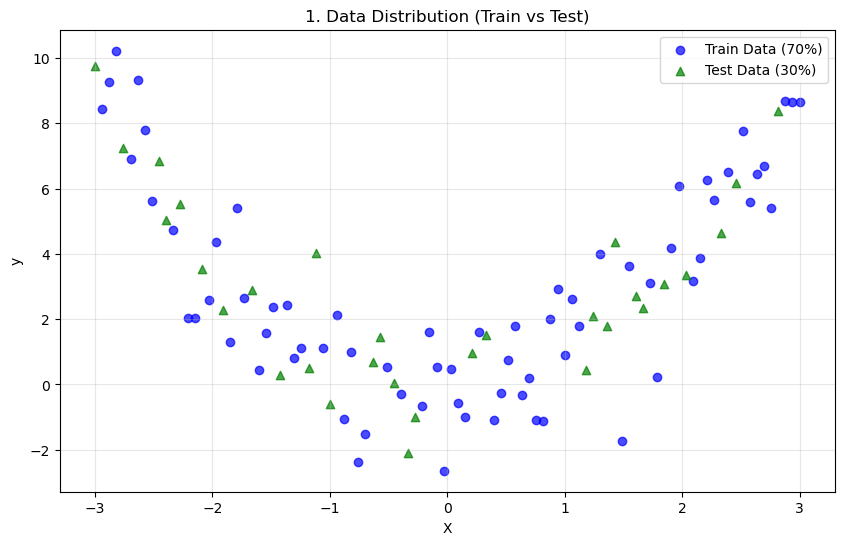

In [13]:
# plotting
# Plot 1:Only Data Distribution
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data (70%)', alpha=0.7)
plt.scatter(X_test, y_test, color='green', marker='^', label='Test Data (30%)', alpha=0.7)
plt.title('1. Data Distribution (Train vs Test)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


NameError: name 'line_equation' is not defined

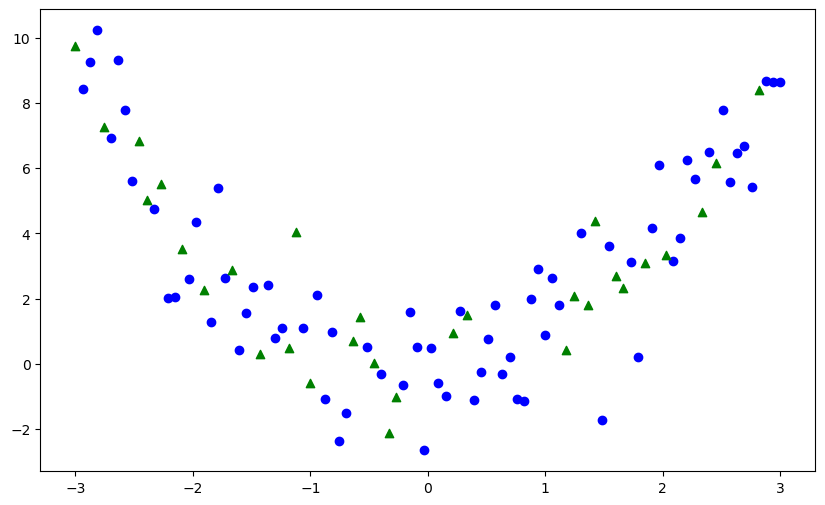

In [14]:
# 2. Plot Linear Resgression Fit With Equation
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', marker='^', label='Test Data')

plt.plot(X, model.predict(X), color='red', linewidth=3, label=f'Model:{Line_equation}')

# Added the equation to the title
plt.title(f'2. Liner Regression Fit (underfitting)\nTest RMSE:{rmse_test:.2f} |Test R2: {r2_test:.2f}\n Equation: {line_equation}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
